In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("top_anime_raw_data.csv")

In [23]:
df

,Title,Score,Info
0,Sousou no Frieren,9.30,TV (28 eps) Sep 2023 - Mar 2024 ...
1,Fullmetal Alchemist: Brotherhood,9.10,TV (64 eps) Apr 2009 - Jul 2010 ...
2,Steins;Gate,9.07,TV (24 eps) Apr 2011 - Sep 2011 ...
3,Shingeki no Kyojin Season 3 Part 2,9.05,TV (10 eps) Apr 2019 - Jul 2019 ...
4,One Piece Fan Letter,9.05,TV Special (1 eps) Oct 2024 - Oct 2024 ...
...,...,...,...
245,Hellsing Ultimate,8.35,OVA (10 eps) Feb 2006 - Dec 2012 ...
246,Initial D First Stage,8.35,TV (26 eps) Apr 1998 - Dec 1998 ...
247,Douluo Dalu 2nd Season,8.34,ONA (237 eps) Dec 2018 - Jun 2023 ...
248,Fumetsu no Anata e,8.34,TV (20 eps) Apr 2021 - Aug 2021 ...


In [31]:
# Data Cleaning and Preprocessing
df["Score"] = df["Score"].replace("N/A", None).astype(float)
df[['Type', 'Episodes', 'Aired']] = df["Info"].str.extract(
    r'(?P<Type>.*?)\s*\((?P<Episodes>\d+|\?)\s*eps\)\,?\s*(?P<Aired>.+)?'
)
df['Aired']=df['Aired'].str.extract(r'^(.+\d{4})')[0]
df["Episodes"] = df["Episodes"].str.extract(r'(\d+)').astype(float)
df.drop(columns=["Info"], inplace=True)

In [32]:
df

,Title,Score,Type,Episodes,Aired
0,Sousou no Frieren,9.30,TV,28.0,Sep 2023 - Mar 2024
1,Fullmetal Alchemist: Brotherhood,9.10,TV,64.0,Apr 2009 - Jul 2010
2,Steins;Gate,9.07,TV,24.0,Apr 2011 - Sep 2011
3,Shingeki no Kyojin Season 3 Part 2,9.05,TV,10.0,Apr 2019 - Jul 2019
4,One Piece Fan Letter,9.05,TV Special,1.0,Oct 2024 - Oct 2024
...,...,...,...,...,...
245,Hellsing Ultimate,8.35,OVA,10.0,Feb 2006 - Dec 2012
246,Initial D First Stage,8.35,TV,26.0,Apr 1998 - Dec 1998
247,Douluo Dalu 2nd Season,8.34,ONA,237.0,Dec 2018 - Jun 2023
248,Fumetsu no Anata e,8.34,TV,20.0,Apr 2021 - Aug 2021


In [33]:
df.nlargest(10, "Score")[["Title", "Score", "Type"]]

,Title,Score,Type
0,Sousou no Frieren,9.30,TV
1,Fullmetal Alchemist: Brotherhood,9.10,TV
2,Steins;Gate,9.07,TV
3,Shingeki no Kyojin Season 3 Part 2,9.05,TV
4,One Piece Fan Letter,9.05,TV Special
5,Gintama°,9.05,TV
6,Gintama: The Final,9.04,Movie
7,Hunter x Hunter (2011),9.03,TV
8,Gintama',9.02,TV
9,Gintama': Enchousen,9.02,TV


In [41]:
df['Year']=df['Aired'].str.extract(r'(\d{4})')
df['Year']=pd.to_numeric(df['Year'], errors="coerce")

In [39]:
df

,Title,Score,Type,Episodes,Aired,Year
0,Sousou no Frieren,9.30,TV,28.0,Sep 2023 - Mar 2024,2023
1,Fullmetal Alchemist: Brotherhood,9.10,TV,64.0,Apr 2009 - Jul 2010,2009
2,Steins;Gate,9.07,TV,24.0,Apr 2011 - Sep 2011,2011
3,Shingeki no Kyojin Season 3 Part 2,9.05,TV,10.0,Apr 2019 - Jul 2019,2019
4,One Piece Fan Letter,9.05,TV Special,1.0,Oct 2024 - Oct 2024,2024
...,...,...,...,...,...,...
245,Hellsing Ultimate,8.35,OVA,10.0,Feb 2006 - Dec 2012,2006
246,Initial D First Stage,8.35,TV,26.0,Apr 1998 - Dec 1998,1998
247,Douluo Dalu 2nd Season,8.34,ONA,237.0,Dec 2018 - Jun 2023,2018
248,Fumetsu no Anata e,8.34,TV,20.0,Apr 2021 - Aug 2021,2021


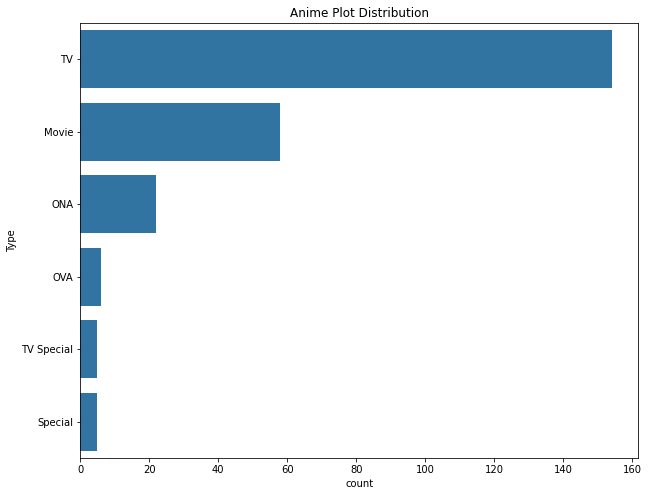

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y='Type', order=df['Type'].value_counts().index)
plt.title("Anime Plot Distribution")
plt.savefig('visuals/type_distribution.png')
plt.show()

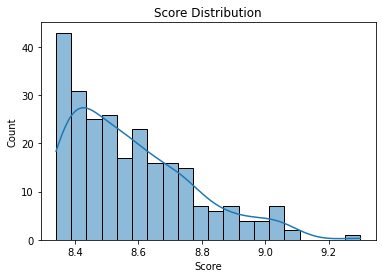

In [47]:
sns.histplot(data=df,x='Score',bins=20,kde=True)
plt.title("Score Distribution")
plt.savefig("visuals/score_distribution.png")
plt.show()

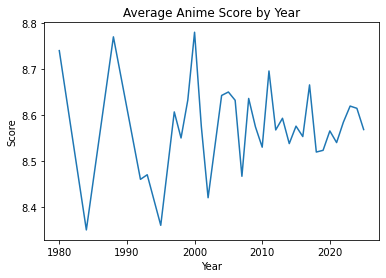

In [52]:
sns.lineplot(data=df.groupby("Year")['Score'].mean().reset_index(),x='Year',y='Score')
plt.title("Average Anime Score by Year")
plt.savefig("visuals/score_by_year.png")
plt.show()

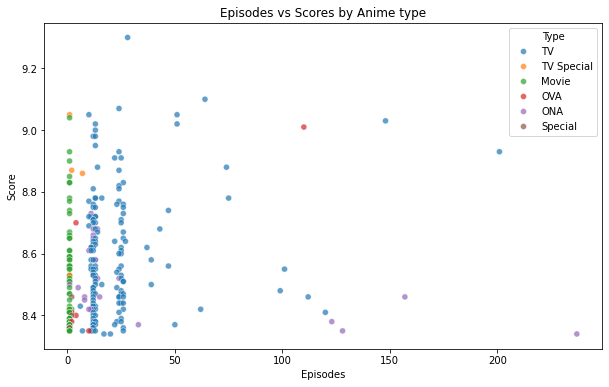

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Episodes', y='Score', hue='Type',alpha=0.7)
plt.title("Episodes vs Scores by Anime type")
plt.savefig("visuals/episodes_vs_score.png")
plt.show()